<a href="https://colab.research.google.com/github/abigailmwaura26/Data-Mining/blob/main/WEEK5_BBC_ExerciseV2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from os import getcwd



This Python notebook is from *Exercise 2 BBC News Archive* in the Coursera class *Natural Language Processing in Tensorflow*.

Adapted by Jung Hee Kim and Michael Glass.

## Use word embeddings and a neural network to classify BBC news articles.

In [28]:
# Fetch the dataset of BBC news articles, with six different categories
# You can read about this dataset here: https://www.kaggle.com/yufengdev/bbc-fulltext-and-category
#
!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
path_bbc = "bbc-text.csv"

--2025-02-08 22:08:51--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘bbc-text.csv.1’

bbc-text.csv.1      100%[===================>]   4.82M  6.50MB/s    in 0.7s    

2025-02-08 22:08:52 (6.50 MB/s) - ‘bbc-text.csv.1’ saved [5057493/5057493]



In [29]:
# Here are parameters that you can adjust for this lab.
#
# Parameters for producing sequences of number-tokens
#
vocab_size = 1000   # Number of most-common vocabulary words to recognize
max_length = 120    # Standardized length (in word-tokens) of one article
trunc_type = 'post' # Longer articles are truncated after max_length words
padding_type = 'post' # Shorter articles are padded at the right end
oov_tok = '<oov> '  # Uncommon words are replaced with this fake-word

# For splitting between training and testing
training_portion = .8

# Size of embedding vectors for neural network processing
embedding_dim = 22

In [30]:
#  Function to prepare the text of an article.
#  Right now it simply:
#    -- makes lower-case
#    -- removes extra white-space, mulitple spaces are condensed to single space
#
#  You can also update the function to return the article with stop words removed
#
def prepareText(s):
  # Lowercase
  t = s.lower()
  # Split into list of words.  This will eliminate all the white space.
  tlist = t.split()
  #
  # CODE FOR REMOVING STOPWORDS HERE.  Remove comment.
  tlist = [w for w in tlist if w not in stopwords]
  #
  # Then rejoin into a single article string, with a single space between words
  t = ' '.join(tlist)
  return t

#
#  Stopwords are very common words, which often do not contribute any
#  information to the task at hand. They are often deleted.
#  This is a common list of stop words.
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

# Test the prepareText function
#
testArticle = "I read it in  The  Times of London"
print(prepareText(testArticle))

#   Originally:  I read it in  The  Times of London
# Should print:  i read it in the times of london   (with no stopword removal)
# Should print:  read times london  (with stopword removal)

read times london


In [31]:
# Variables for reading and preparing the text
#
# One article is stored as the text of a whole BBC article as a single string.
#
articles = []           # List of articles in original form.
articlesPrepared = []   # Articles with texts prepared for tokenization
#
#  Each article has a label like "business", "sport", "tech" etc.
labels = []



In [32]:
# The BBC data is in a CSV spreadsheet file, one article in each spreadsheet row.
# The two spreadsheet column headings of interest are 'text' and 'category'
#
# Read the spreadsheet and make three lists, with one entry for each article.
#
with open(path_bbc, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for item in csv_reader:
        articles.append(item['text'])  # Article text
        articlesPrepared.append(prepareText(item['text'])) # Prepared version
        labels.append(item['category'])  # Article category label

# Print the label and the texts of the first few articles
for i in range(3):
  print(labels[i])
  print(articles[i])
  print(articlesPrepared[i])
  print()


tech
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to 

In [33]:
# Now split into training and validation sets
# Use the training_portion variable.
#
train_size =  int(len(articles) * training_portion)


train_articles = articles[:train_size]
train_articles = articlesPrepared[:train_size]
train_labels = labels[:train_size]

validation_articles =  articles[train_size:]
validation_labels =  labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

# Expected output (if training_portion=0.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [34]:
# The training articles: tokenize and turn into sequences of word-tokens
#
# Make a tokenizer object.
#   It will utilize the vocab_size most common words
#   The less common words will be repleaced with the oov_tok fake word
#
tokenizer =  Tokenizer(num_words = vocab_size, oov_token=oov_tok)
#
#  Use your training articles to 'fit' the tokenizer. It will count all the words,
#  assign numbers to the most common words.
#
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

# Convert your training articles to sequences of number-tokens.
# Then standardize the length of the sequences, truncating or padding as needed
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

print(len(train_sequences[0]))

print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput (assuming training_portion = 0.8)
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [35]:
# Now do the same for the validation articles: tokenize and turn into sequences
#
validation_sequences =  tokenizer.texts_to_sequences(validation_articles)
validation_padded =  pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [36]:
#  Here you can decode and print the sequences back into article texts.
#  Try it for a few sentences.
#
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_articles[0])   # Try several different articles, not only 0
print(decode_sentence(train_sequences[0]))

#expected decoded ouput, assuming stopword removal
# tv future hands viewers home theatre systems plasma high-definition tvs digital video
# tv future <oov>  <oov>  home theatre systems <oov>  high <oov>  <oov>  digital video

tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satelli

In [37]:
#  Here we convert the category words to numbers.
#  "sport" will become 1, "business" will become 2, etc.
#
#  We can use the tokenizer as a kind of programming trick.
#  We will 'fit' the tokenizer on the labels, each label is effectively a one-word sentence.
#  So each category word will be assigned a number-token, the label will become a single number.
#
# First make a Tokenizer object and fit it.
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

print(label_tokenizer.word_index)
# Should print:
#   {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

# Convert the training and validation labels into number-tokens.
# Then use np.array() to make 1-dimensional np arrays
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [38]:
# Neural network!  Four layers.
#
#  First is an Embedding layer, which converts each number-token into a vector
#  The output of the embedding layer is one vector for each word, so if each
#  input sequence has 50 words (50 numbers-tokens) and the embedding dimension is 15,
#  the output is a 2D tensor 50 x 15.
#
#  The next layer will either:
#    a) Flatten the 2D tensor to 1-dimension, e.g. 750 numbers
#    b) Average up the each dimension using GlobalAveragePooling1D.
#       This will produce single vector representing an
#       embedding of the average word, e.g. 15 numbers
#
#  Then comes a hidden layer, densely connected.
#
#  Finally a softmax output layer, one neuron for each label/category number.
#  Output layer is six instead of five, as we are not using category number 0.
#
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.GlobalAveragePooling1D(),    # YOUR CODE HERE: uncomment to
    tf.keras.layers.Flatten(),                   #  pick Flatten() or GlobalAveragePooling1D()
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected summary output with:
#    120-word sequences and 16-number embedding vectors
#    using GlobalAveragePooling for the 2nd layer
#
# Layer (type)                 Output Shape              Param #
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0
# _________________________________________________________________
# dense (Dense)                (None, 24)                408
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
## Time to train and validate the neural network classifier, using model.fit()
#
# The validation data is tested after each training epoch. (We don't wait until training is done in order to test.)
#
num_epochs = 25
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2333 - loss: 1.7307 - val_accuracy: 0.1685 - val_loss: 1.6127
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4613 - loss: 1.3998 - val_accuracy: 0.5685 - val_loss: 1.2559
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8643 - loss: 0.7141 - val_accuracy: 0.7663 - val_loss: 0.8123
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.2304 - val_accuracy: 0.7708 - val_loss: 0.6552
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.1143 - val_accuracy: 0.7865 - val_loss: 0.5934
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0556 - val_accuracy: 0.8180 - val_loss: 0.5170
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0365 - val_accuracy: 0.8315 - val_loss: 0.5218
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 0.7955 - val_loss

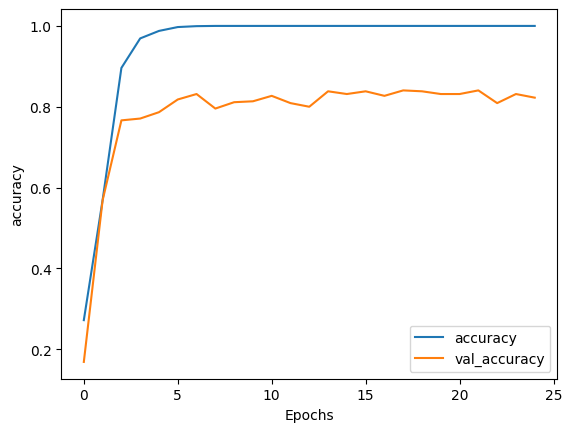

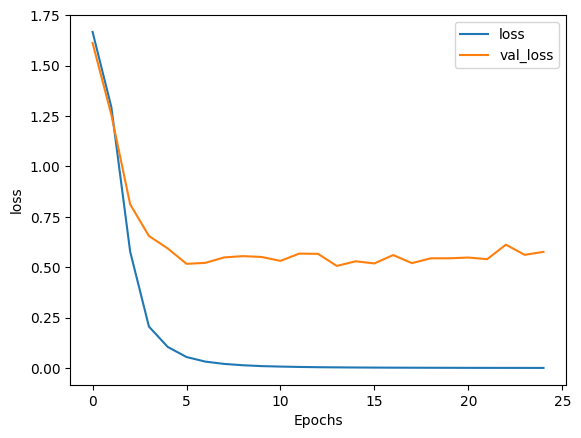

In [40]:
# These two graphs will show how the training and validation improved for each epoch.
# It may show that the training data accuracy improves even after the validation data
#  accuracy stopped improving.
#
#  This shows that the network is over-training a little bit.
#
%matplotlib inline
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
# For fun, if you are interested, you can extract the embedding vectors.
# Here is how to extract them from the trained neural network.
#
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output, using a maximum vocabulary of 1000 words and 16 element vectors
# (1000, 16)

(1000, 22)


**Now we will compare the embeddings of several words of your choice**, using cosine similarity.

Since this network was trained for a classification task using only 5 categories, generally the words which are indicative of a particular category should show vector similarity.

In [42]:
# FIRST: Put your words here and test them

words = ['gamble', 'bid', 'former', 'boss', 'people', 'watch'] # put your words here
words = ['london', 'people', 'digital', 'lost', 'rugby', 'player'] # put your words here
for w in words:
  if not w in word_index:
    print(w, "not recognized")
  elif word_index[w] >= vocab_size:
    print(w, word_index[w], "> vocab_size")
  else:
    print(w, word_index[w], 'OK')


london 117 OK
people 9 OK
digital 139 OK
lost 268 OK
rugby 434 OK
player 226 OK


In [43]:
# SECOND: Compute all comparisons

# Compare two vectors with cosine: (A dot B) / (|A| * |B|)
#
def comp(A, B):
  return np.dot(A,B) / (np.linalg.norm(A) * np.linalg.norm(B))

# Print all comparisons
for i in range(len(words)-1):
  w1 = words[i]
  v1 = weights[word_index[w1]]
  for j in range(i+1,len(words)):
    w2 = words[j]
    v2 = weights[word_index[w2]]
    print("cosine", w1, w2, '=', comp(v1, v2))

cosine london people = -0.27124748
cosine london digital = -0.054102782
cosine london lost = 0.4309247
cosine london rugby = 0.01666379
cosine london player = -0.35876274
cosine people digital = 0.7187384
cosine people lost = -0.3405163
cosine people rugby = -0.687418
cosine people player = -0.23650463
cosine digital lost = -0.4465795
cosine digital rugby = -0.6257315
cosine digital player = -0.32851917
cosine lost rugby = 0.35934314
cosine lost player = -0.14279865
cosine rugby player = 0.7144027
